# Opérations de symmétrie du $Ca_2BrN$

Quentin Bodart - 70362100

## Imports

In [304]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
import random as rd
from IPython.display import display

## Récupération des données

In [305]:
mp_key = "cLLBrCi8gU7SqhnPKS4NJqSKB4Y6d0gD"
mp_id = "mp-23009"

with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
    sga = SpacegroupAnalyzer(structure)
    conv_struct = sga.get_conventional_standard_structure()
    symm_ops = sga.get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Structure conventionelle

In [306]:
quick_view(conv_struct, "packed")

JsmolView(layout=Layout(align_self='stretch', height='400px'))

## Sélection et représentation
Chaque opération de symétrie est représentée par une matrice de rotation **rot** et un vecteur de déplacement **tau**.  
On choisit au hasard 3 opérateurs et on l'applique aux 3 atomes différents.  
JSmol ne fonctionnant pas toujours, j'ai ajouté des captures d'écran du résultat attendu.

### Symétrie 1 : Inversion

In [310]:
op = 3
atom = 4
symm_op = symm_ops[op]

atom_orig = conv_struct.sites[atom]
frac_orig = atom_orig.frac_coords
frac_dest = symm_op.operate(frac_orig)


print("Opération de symétrie 1 : Inversion de centre [0,0,0]\n",
     f"Atome : Ca\n",
     f"Matrice de rotation :\n{symm_op.rotation_matrix}\n",
     f"Vecteur de translation :\n{symm_op.translation_vector}\n",
     f"Positions de l'atome avant et après l'opérateur de symétrie :\n{frac_orig}\n{frac_dest}"
)
view = quick_view(conv_struct, "packed", conventional = True)
display(view)
view.script('draw SYMOP 2 {atomno = 6}')

Opération de symétrie 1 : Inversion de centre [0,0,0]
 Atome : Ca
 Matrice de rotation :
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
 Vecteur de translation :
[0. 0. 0.]
 Positions de l'atome avant et après l'opérateur de symétrie :
[0.66666667 0.33333333 0.55916003]
[-0.66666667 -0.33333333 -0.55916003]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

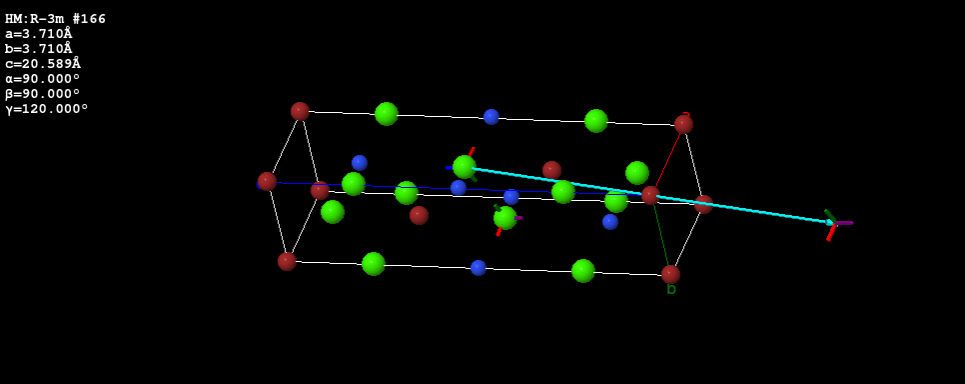

### Symétrie 2 : Rotoinversion

In [312]:
op = 7
atom = 7
symm_op = symm_ops[op]

atom_orig = conv_struct.sites[atom]
frac_orig = atom_orig.frac_coords
frac_dest = symm_op.operate(frac_orig)


print("Opération de symétrie 2 : Rotoinversion d'ordre 3\n",
     f"Atome : Br\n",
     f"Matrice de rotation :\n{symm_op.rotation_matrix}\n",
     f"Vecteur de translation :\n{symm_op.translation_vector}\n",
     f"Positions de l'atome avant et après l'opérateur de symétrie :\n{frac_orig}\n{frac_dest}"
)
view = quick_view(conv_struct, "packed", conventional = True)
display(view)
view.script('draw SYMOP 4 {atomno = 7}')

Opération de symétrie 2 : Rotoinversion d'ordre 3
 Atome : Br
 Matrice de rotation :
[[ 0.  0. -1.]
 [-1.  0.  0.]
 [ 0. -1.  0.]]
 Vecteur de translation :
[0. 0. 0.]
 Positions de l'atome avant et après l'opérateur de symétrie :
[0.66666667 0.33333333 0.33333333]
[-0.33333333 -0.66666667 -0.33333333]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

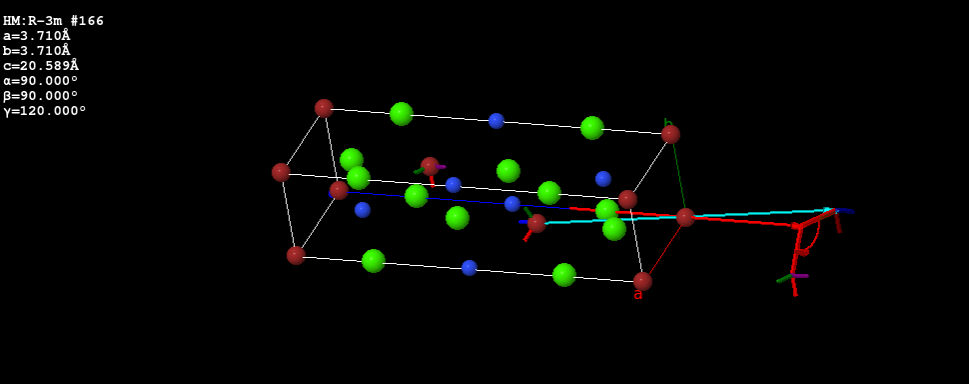

### Symétrie 3 : Rotation d'ordre 3

In [340]:
op = 19
atom = 9
symm_op = symm_ops[op]

atom_orig = conv_struct.sites[atom]
frac_orig = atom_orig.frac_coords
frac_dest = symm_op.operate(frac_orig)


print("Opération de symétrie 3 : Symétrie axiale d'ordre 3\n",
     f"Atome : N\n",
     f"Matrice de rotation :\n{symm_op.rotation_matrix}\n",
     f"Vecteur de translation :\n{symm_op.translation_vector}\n",
     f"Positions de l'atome avant et après l'opérateur de symétrie :\n{frac_orig}\n{frac_dest}"
)
view = quick_view(conv_struct, "packed", conventional = True)
display(view)
view.script('draw SYMOP 5 {atomno = 5}')

Opération de symétrie 3 : Symétrie axiale d'ordre 3
 Atome : N
 Matrice de rotation :
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
 Vecteur de translation :
[0. 0. 0.]
 Positions de l'atome avant et après l'opérateur de symétrie :
[0.66666667 0.33333333 0.83333333]
[0.33333333 0.66666667 0.83333333]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

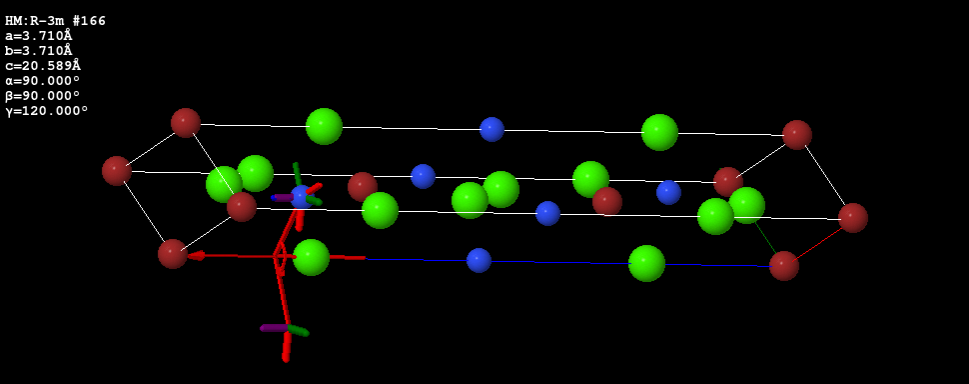